## 使用Numpy实现机器学习
了解了Numpy、Tensor的基础内容，对如何用Numpy、Tensor操作数组有了一定认识。为了加深对Pytorch是如何进行完成机器学习、深度学习，接下来分别用Numpy、Tensor、autograd、nn及optimal实现同一个机器学习任务，比较他们之间的异同及各自优缺点，从而加深对Pytorch的理解。
首先，我们用最原始的Numpy实现有关回归的一个机器学习任务，不用Pytorch中的包或类。这种方法代码可能多一点，但每一步都是透明的，有利于理解每步的工作原理。
主要步骤包括：

首先，是给出一个数组x，然后基于表达式：y=3x^2+2，加上一些噪音数据到达另一组数据y。

然后，构建一个机器学习模型，学习表达式y=wx^2+b的两个参数w，b。利用数组x，y的数据为训练数据

最后，采用梯度梯度下降法，通过多次迭代，学习到w、b的值。

以下为具体步骤：

（1）导入需要的库

In [1]:
# -*- coding: utf-8 -*-
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

（2）生成输入数据x及目标数据y
设置随机数种子，生成同一份数据，以便用多种方法进行比较。

In [2]:
np.random.seed(100) # 设置随机种子
x = np.linspace(-1, 1, 100).reshape(100,1) # 生成100个-1到1之间的数，reshape成100x1的形状
y = 3*np.power(x, 2) +2+ 0.2*np.random.rand(x.size).reshape(100,1)# 通过表达式计算出真实值，reshape成100x1的形状

为什么要变成100x1的形状，可以这样理解，x的每一行是需要传入的参数，而y的每一行是真实值

（3）查看x，y数据分布情况

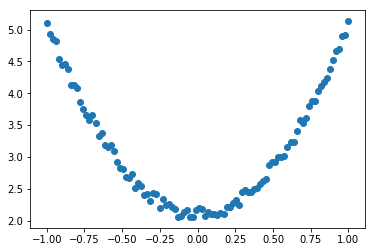

In [3]:
# 画图
plt.scatter(x, y)
plt.show()

（4）初始化权重参数

In [4]:
# 随机初始化参数
w1 = np.random.rand(1,1)
b1 = np.random.rand(1,1) 
print(w1,b1)

[[0.77828922]] [[0.7795984]]


（5）训练模型
定义损失函数，假设批量大小为100：
![jupyter](http://www.feiguyunai.com/wp-content/uploads/2019/09/2e4ba2ba407b80439b5888d310093c18.png)

# 在这说一下什么是梯度下降和梯度下降的原理

## 梯度是什么呢
说白了就是对表达式中变量求偏导组成的一个向量，在一元函数中，梯度其实就是微分，既函数的变化率，而在多元函数中，梯度变为了向量，同样表示函数变化的方向，从几何意义来讲，梯度的方向表示的是函数增加最快的方向，而我们训练的目的是使loss值变小，而且越小越好，而梯度的反方向就是loss值下降的最快的方向，所以每一次我们都把权重-=lr*梯度
## 学习率又是啥
我们可以这样理解，学习率为我们下降的步长，梯度是偏导数，他是不断变化的，所以需要使用学习率lr限制一下下降多少，约束他的改变

## 梯度下降分类
### 批量梯度下降
计算公式：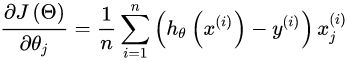
对样本梯度求和取平均值

迭代公式:

### 随机梯度下降
计算公式：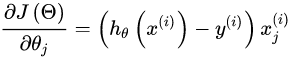
随机取一个样本计算梯度

迭代公式：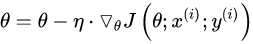

### 小批量梯度下降
计算公式：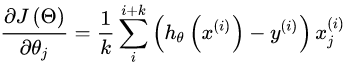
随机取一定样本计算梯度取平均

迭代公式：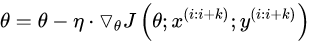

|方法|            BGD（批量）     |SGD（随机）                     |MBGD（小批量|
|:-|:-|:-|:-|
|优点|非凸函数可保证收敛至全局最优解   |计算速度快                     |计算速度快，收敛稳定|
|缺点|计算速度缓慢，不允许新样本中途进入              |计算结果不易收敛，可能会陷入局部最优解中	|—|

In [5]:
# 代码实现
lr =0.001 # 学习率
 
for i in range(800):
    # 前向传播
    y_pred = np.power(x,2)*w1 + b1
    # 定义损失函数
    loss = 0.5 * (y_pred - y) ** 2
    loss = loss.sum()
    #计算梯度，此处公式依照（2，9）（2，10）
    grad_w=np.sum((y_pred - y)*np.power(x,2))
    grad_b=np.sum((y_pred - y))
    #使用梯度下降法，是loss最小
    w1 -= lr * grad_w
    b1 -= lr * grad_b

（6）可视化结果

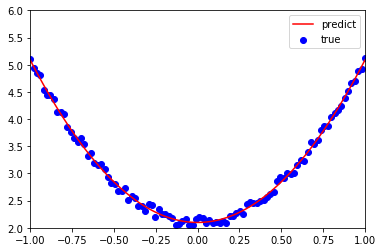

[[2.98927619]] [[2.09818307]]


In [6]:
plt.plot(x, y_pred,'r-',label='predict')
plt.scatter(x, y,color='blue',marker='o',label='true') # true data
plt.xlim(-1,1)
plt.ylim(2,6)  
plt.legend()
plt.show()
print(w1,b1)# 打印w，b的值

## 使用Tensor及antograd实现机器学习
使用numpy可以说是纯手工完成一个机器学习任务，数据用Numpy表示，梯度及学习是自己定义并构建学习模型。这种方法适合于比较简单的情况，如果稍微复杂一些，代码量将几何级增加。是否有更方便的方法呢？这次我们将使用Pytorch的自动求导的一个包antograd，利用这个包及对应的Tensor，便可利用自动反向传播来求梯度，无需手工计算梯度。以下是具体实现代码。

（1）导入需要的库

In [7]:
import torch as t
%matplotlib inline
 
from matplotlib import pyplot as plt

（2）生成训练数据，并可视化数据分布情况

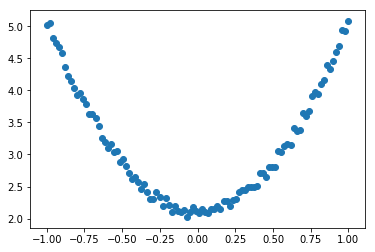

In [8]:
t.manual_seed(100) 
dtype = t.float
#生成x坐标数据，x为tenor，需要把x的形状转换为100x1
x = t.unsqueeze(t.linspace(-1, 1, 100), dim=1) 
#生成y坐标数据，y为tenor，形状为100x1，另加上一些噪音
y = 3*x.pow(2) +2+ 0.2*t.rand(x.size())                 
 
# 画图，把tensor数据转换为numpy数据
plt.scatter(x.numpy(), y.numpy())
plt.show()

（3）初始化权重参数

In [9]:
# 随机初始化参数，参数w，b为需要学习的，故需requires_grad=True
w = t.randn(1,1, dtype=dtype,requires_grad=True)
b = t.zeros(1,1, dtype=dtype, requires_grad=True) 
print(w,b)

tensor([[0.2437]], requires_grad=True) tensor([[0.]], requires_grad=True)


（4） 训练模型

In [10]:
lr =0.001 # 学习率
 
for ii in range(800):
    # 前向传播，并定义损失函数loss
    y_pred = x.pow(2).mm(w) + b
    loss = 0.5 * (y_pred - y) ** 2
    loss = loss.sum()
    
    # 自动计算梯度，梯度存放在grad属性中
    loss.backward()  
    # 手动更新参数，需要用torch.no_grad()，使上下文环境中切断自动求导的计算
    with t.no_grad():
        w -= lr * w.grad
        b -= lr * b.grad
    
    # 梯度清零,因为这个梯度会自动累加所以需要清零
        w.grad.zero_()
        b.grad.zero_()

（5）可视化显示

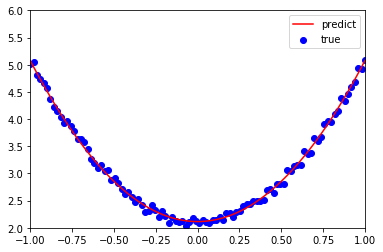

tensor([[2.9645]], requires_grad=True) tensor([[2.1146]], requires_grad=True)


In [11]:
plt.plot(x.numpy(), y_pred.detach().numpy(),'r-',label='predict')#predict
plt.scatter(x.numpy(), y.numpy(),color='blue',marker='o',label='true') # true data
plt.xlim(-1,1)
plt.ylim(2,6)  
plt.legend()
plt.show()
        
print(w, b)

## 使用TensorFlow架构
上面用Pytorch的autograd及Tensor实现了这个任务。下面我们用深度学习的另一个框架TensorFlow实现该回归分析任务，大家可比较一下，使用不同架构之间的一些区别。为便于比较，这里使用TensorFlow的静态图（TensorFlow2.0 新增核心功能Eager Execution，并把Eager Execution变为 TensorFlow 默认的执行模式。这意味着 TensorFlow 如同 PyTorch 那样，由编写静态计算图全面转向了动态计算图）。

（1）导入需要的库

In [12]:
# -*- coding: utf-8 -*-
import tensorflow as tf
import numpy as np
 
#生成训练数据
np.random.seed(100) 
x = np.linspace(-1, 1, 100).reshape(100,1) 
y = 3*np.power(x, 2) +2+ 0.2*np.random.rand(x.size).reshape(100,1)  

（2）初始化参数

In [13]:
# 创建两个占位符，分别用来存放输入数据x和目标值y
#运行计算图时，导入数据.
x1 = tf.placeholder(tf.float32, shape=(None, 1))
y1 = tf.placeholder(tf.float32, shape=(None, 1))
 
# 创建权重变量w和b，并用随机值初始化.
# TensorFlow 的变量在整个计算图保存其值.
w = tf.Variable(tf.random_uniform([1], 0, 1.0))
b = tf.Variable(tf.zeros([1]))
print(x1,y1)
print(w,b)

Tensor("Placeholder:0", shape=(?, 1), dtype=float32) Tensor("Placeholder_1:0", shape=(?, 1), dtype=float32)
<tf.Variable 'Variable:0' shape=(1,) dtype=float32_ref> <tf.Variable 'Variable_1:0' shape=(1,) dtype=float32_ref>


placeholder是一个之后需要加载数据的容器。我们可以基于它在不需要数据的情况下创造各种各样的操作，搭建我们的计算图。我们最后把数据载入我们的计算图就通过这些placeholders。

（3）实现前向传播及损失函数

In [14]:
# 前向传播，计算预测值.
y_pred = np.power(x,2)*w + b
 
# 计算损失值
loss=tf.reduce_mean(tf.square(y-y_pred)) 
 
# 计算有关参数w、b关于损失函数的梯度.
grad_w, grad_b = tf.gradients(loss, [w, b])
 
#用梯度下降法更新参数. 
# 执行计算图时给 new_w1 和new_w2 赋值
# 对TensorFlow 来说，更新参数是计算图的一部分内容
# 而PyTorch，这部分是属于计算图之外.
learning_rate = 0.01
new_w = w.assign(w - learning_rate * grad_w)
new_b = b.assign(b - learning_rate * grad_b)

（4）训练模型

In [15]:
# 已构建计算图, 接下来创建TensorFlow session，准备执行计算图.
with tf.Session() as sess:
    # 执行之前需要初始化变量w、b
    sess.run(tf.global_variables_initializer())
    for step in range(2000):
        # 循环执行计算图. 每次需要把x1,y1赋给x和y.
        # 每次执行计算图时，需要计算关于new_w和new_b的损失值,
        # 返回numpy多维数组
        loss_value, v_w, v_b = sess.run([loss, new_w, new_b],
                                    feed_dict={x1: x, y1: y})# 把x，y的值赋给x1，y1
        if  step%200==0:  #每200次打印一次训练结果
            print("损失值、权重、偏移量分别为{:.4f},{},{}".format(loss_value,v_w,v_b))

损失值、权重、偏移量分别为9.5305,[0.41164938],[0.05966451]
损失值、权重、偏移量分别为0.1294,[1.8262572],[2.4976208]
损失值、权重、偏移量分别为0.0681,[2.160023],[2.4050913]
损失值、权重、偏移量分别为0.0369,[2.3930638],[2.3190758]
损失值、权重、偏移量分别为0.0207,[2.5607219],[2.2569623]
损失值、权重、偏移量分别为0.0123,[2.6813965],[2.2122526]
损失值、权重、偏移量分别为0.0080,[2.7682543],[2.1800723]
损失值、权重、偏移量分别为0.0058,[2.8307712],[2.1569092]
损失值、权重、偏移量分别为0.0046,[2.875769],[2.1402378]
损失值、权重、偏移量分别为0.0040,[2.9081554],[2.1282382]


（5）可视化操作

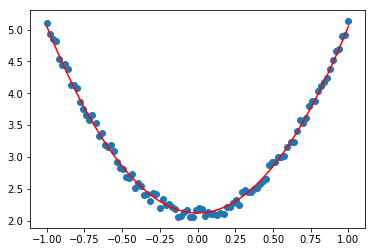

In [16]:
# 可视化结果            
plt.figure() 
plt.scatter(x,y)
plt.plot (x, v_b + v_w*x**2,'r')

## 不同实现方法的比较
numpy是对过程最清晰的，但是所有的一切都需要自己来计算，对于复杂的结构模型一定是不可取的；

tensor实现呢，省略掉了人工计算梯度的过程，也相对清晰，但是梯度计算的时候需要注意使用torch.no_grad()，使上下文环境中切断自动求导的计算，梯度清零

tensorflow实现的过程，首先先要利用placeholders()搭建好计算图，然后使用session来执行计算图。

其实整体思路差不太多，个人还是觉得pytorch比较清晰一点，tensorflow的话，步骤繁琐，不像正常的python语言容易理解。